In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = './Pipette_Calibration/'

In [3]:
p1000_data = data_path + '19121401_Pipette_Calibration - 1000.csv'
p200_data = data_path + '19121401_Pipette_Calibration - 200.csv'
p20_data = data_path + '19121401_Pipette_Calibration - 20.csv'
p20A_data = data_path + '19121401_Pipette_Calibration - 20_A.csv'

In [4]:
p1000df = pd.read_csv(p1000_data, skiprows=2)
p200df = pd.read_csv(p200_data, skiprows=2)
p20df = pd.read_csv(p20_data, skiprows=2)
p20Adf = pd.read_csv(p20A_data, skiprows=2)

In [5]:
p1000df.head()

,Plunger,mass
0,0,0.9860
1,0,1.0014
2,0,0.9932
3,0,0.9927
4,21,1.6332


In [6]:
p20Adf.head()

,Plunger,Before,After,Mass
0,6,0.9868,0.9910,0.0042
1,6,0.9788,0.9834,0.0046
2,6,0.9850,0.9904,0.0054
3,21,0.9787,0.9927,0.0140
4,11,0.9798,0.9868,0.0070


In [7]:
p1000grouped = p1000df.groupby('Plunger').mean()
p200grouped = p200df.groupby('Plunger').mean()
p20grouped = p20df.groupby('Plunger').mean()
p20Agrouped = p20Adf.groupby('Plunger').mean()

In [8]:
p20Adf.groupby('Plunger').std()

,Before,After,Mass
Plunger,,,
0,NaN,NaN,NaN
1,0.003310,0.003610,0.000755
6,0.003642,0.003675,0.000500
11,0.006498,0.007978,0.001515
16,0.002645,0.001879,0.000909
21,0.007771,0.008014,0.000503
26,0.002307,0.002639,0.000490


In [9]:
p1000grouped['std'] = p1000df.groupby('Plunger').std()
p200grouped['std'] = p200df.groupby('Plunger').std()
p20grouped['std'] = p20df.groupby('Plunger').std()
p20Agrouped['std'] = p20Adf.groupby('Plunger').std()['Mass']

In [10]:
p20Agrouped

,Before,After,Mass,std
Plunger,,,,
0,0.986800,0.987900,0.001100,NaN
1,0.989100,0.990750,0.001650,0.000755
6,0.984150,0.988900,0.004750,0.000500
11,0.984975,0.993000,0.008025,0.001515
16,0.985550,0.997350,0.011800,0.000909
21,0.988175,1.002075,0.013900,0.000503
26,0.986650,1.003350,0.016700,0.000490


In [11]:
p20Agrouped = p20Agrouped.rename(columns={'Mass': 'mass'})

In [12]:
p20grouped = p20Agrouped.copy()

In [13]:
p1000grouped['mass'] = p1000grouped.mass - p1000grouped.mass.loc[0]
p200grouped['mass'] = p200grouped.mass - p200grouped.mass.loc[0]
p20grouped['mass'] = p20grouped.mass - p20grouped.mass.loc[0]

In [14]:
p1000grouped = p1000grouped.reset_index()
p200grouped = p200grouped.reset_index()
p20grouped = p20grouped.reset_index()

In [15]:
p1000grouped.reset_index()

,index,Plunger,mass,std
0,0,0,0.000000,0.006305
1,1,1,0.031200,0.004171
2,2,6,0.186475,0.004167
3,3,11,0.334500,0.010511
4,4,16,0.494500,0.008716
5,5,21,0.641125,0.005536
6,6,26,0.796025,0.002577


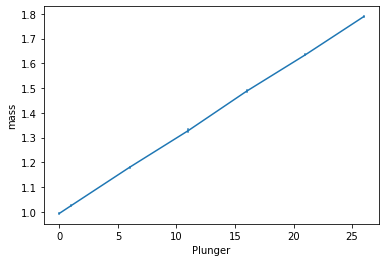

In [16]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p1000df)

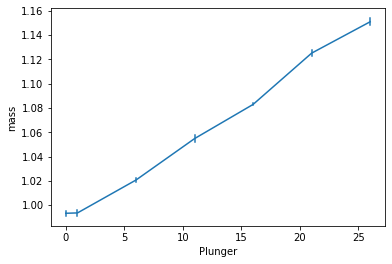

In [17]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p200df)

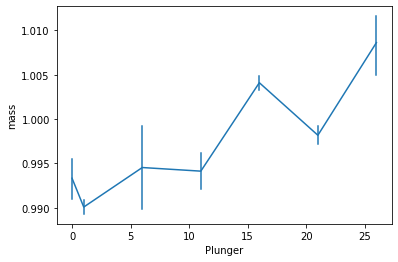

In [18]:
ax = sns.lineplot(x="Plunger", y="mass", err_style="bars", ci=68, data=p20df)

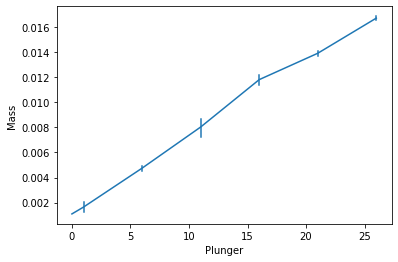

In [19]:
ax = sns.lineplot(x="Plunger", y="Mass", err_style="bars", ci=68, data=p20Adf)

In [20]:
p1000grouped.head()

,Plunger,mass,std
0,0,0.000000,0.006305
1,1,0.031200,0.004171
2,6,0.186475,0.004167
3,11,0.334500,0.010511
4,16,0.494500,0.008716


In [21]:
p20grouped

,Plunger,Before,After,mass,std
0,0,0.986800,0.987900,0.000000,NaN
1,1,0.989100,0.990750,0.000550,0.000755
2,6,0.984150,0.988900,0.003650,0.000500
3,11,0.984975,0.993000,0.006925,0.001515
4,16,0.985550,0.997350,0.010700,0.000909
5,21,0.988175,1.002075,0.012800,0.000503
6,26,0.986650,1.003350,0.015600,0.000490


In [22]:
#p20grouped = p20grouped[p20grouped.Plunger >= 11]
p200grouped = p200grouped[p200grouped.Plunger >= 1]

In [23]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [24]:
popt_1000, pcov_1000 = curve_fit(f, p1000grouped.mass, p1000grouped.Plunger) # your data x, y to fit
popt_200, pcov_200 = curve_fit(f, p200grouped.mass, p200grouped.Plunger) # your data x, y to fit
popt_20, pcov_20 = curve_fit(f, p20grouped.mass, p20grouped.Plunger) # your data x, y to fit

In [25]:
popt_1000

array([ 3.26906749e+01, -2.82736187e-02])

In [26]:
k_1000 = popt_1000[0]
b_1000 = popt_1000[1]
k_200 = popt_200[0]
b_200 = popt_200[1]
k_20 = popt_20[0]
b_20 = popt_20[1]

In [36]:
k_1000, b_1000

(32.69067493351639, -0.028273618676054893)

In [27]:
p1000grouped['fit'] = p1000grouped.mass * k_1000 + b_1000

In [28]:
p1000grouped

,Plunger,mass,std,fit
0,0,0.000000,0.006305,-0.028274
1,1,0.031200,0.004171,0.991675
2,6,0.186475,0.004167,6.067720
3,11,0.334500,0.010511,10.906757
4,16,0.494500,0.008716,16.137265
5,21,0.641125,0.005536,20.930535
6,26,0.796025,0.002577,25.994321


In [29]:
p20grouped

,Plunger,Before,After,mass,std
0,0,0.986800,0.987900,0.000000,NaN
1,1,0.989100,0.990750,0.000550,0.000755
2,6,0.984150,0.988900,0.003650,0.000500
3,11,0.984975,0.993000,0.006925,0.001515
4,16,0.985550,0.997350,0.010700,0.000909
5,21,0.988175,1.002075,0.012800,0.000503
6,26,0.986650,1.003350,0.015600,0.000490


In [30]:
0 * k_200 + b_200

1.4376937688014646

In [31]:
0.02 * k_20 + b_20

32.45965527717369

In [32]:
0.004 * k_20 + b_20

6.40026903195599

In [35]:
0.001 * k_20 + b_20

1.514134110977672

In [38]:
1 * k_1000 + b_1000

32.66240131484034